In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import datasets,linear_model
from re import sub
from decimal import Decimal

In [2]:
#i am importing the csv file
df=pd.read_csv("googleplaystore.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.columns=df.columns.str.replace(' ','')

In [4]:
#printing all the category names
a=df.Category.unique()
len(a)

34

In [5]:
#Total number of apps in each category
df.Category.value_counts(dropna=False)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
#Counting Rating for each category
df.groupby('Category')['Rating'].value_counts().sort_values(ascending=False)

Category  Rating
FAMILY    4.3       206
          4.4       190
          4.5       183
GAME      4.5       174
          4.4       166
                   ... 
          2.7         1
          2.5         1
          2.4         1
          2.3         1
1.9       19.0        1
Name: Rating, Length: 770, dtype: int64

In [7]:
df.shape

(10841, 13)

In [8]:
df.Genres.value_counts(dropna=False)

Tools                         842
Entertainment                 623
Education                     549
Medical                       463
Business                      460
                             ... 
Comics;Creativity               1
February 11, 2018               1
Board;Pretend Play              1
Health & Fitness;Education      1
Racing;Pretend Play             1
Name: Genres, Length: 120, dtype: int64

In [9]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [10]:
#Row with the rating greater than 5 dropped
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Drop row number 10472
df=df.drop(10472)
df[df.Rating<5]   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data Cleaning 

In [12]:
#Removing the $ sign from the price
df['Price'] = df.Price.apply(lambda x: x.replace('$', ''))
# Print the head of df
df.Price.head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [13]:
#Copying installs in new Installs2
df['Installs2']=df['Installs']
df['Installs2']=df.Installs2.apply(lambda x: x.replace('+',''))
df['Installs2']=df.Installs2.apply(lambda x: x.replace(',',''))
df['Installs2']=(df['Installs2']).astype(int)

In [14]:
#Removing 'M' sign from the size column
df['Size'] = df.Size.apply(lambda x: x.replace('M', ''))

In [15]:
#to find number of missing values in each column
print(df.isnull().sum())

App                 0
Category            0
Rating           1465
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       0
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          2
Installs2           0
dtype: int64


In [16]:
df=df[~df['Size'].str.contains("Varies with device")]
df[df['Size'].str.contains("Varies with device")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Installs2


In [17]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
print(df.Size)

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835     9.6
10836    53.0
10837     3.6
10838     9.5
10840    19.0
Name: Size, Length: 8831, dtype: float64


In [18]:
df = df[~df['Size'].isin(['Nan'])]
print(df.isnull().sum())

App                 0
Category            0
Rating           1349
Reviews             0
Size                0
Installs            0
Type                0
Price               0
ContentRating       0
Genres              0
LastUpdated         0
CurrentVer          4
AndroidVer          2
Installs2           0
dtype: int64


In [19]:
#to check how many values are not convertable to int
print (df[ pd.to_numeric(df['Size'], errors='coerce').isnull()].count())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [20]:
# fill missing values of Rating with mean column values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
#fill missing values of Size with mean column values
df['Size'].fillna(df['Size'].mean(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       4
AndroidVer       2
Installs2        0
dtype: int64


In [21]:
# Cleaning Installs for visualisation
df['Installs']=df.Installs.apply(lambda x: x.replace('+',''))
df['Installs']=df.Installs.apply(lambda x: x.replace(',',''))
df['Installs']=(df['Installs']).astype(int)
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [22]:
# **TO convert big values into small ones** 
df['Installs']=np.log(df.Installs)

C:\Users\USer\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
#to check how many values are not convertable to int
print (df[ pd.to_numeric(df['Size'], errors='coerce').isnull()].count())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
Installs2        0
dtype: int64


In [24]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
#print (df.head)

In [25]:
#Convert Reviews to float
df['Reviews']=(df['Reviews']).astype(int)
df.Reviews=((df.Reviews)/100)
df.Reviews

0           1.59
1           9.67
2         875.10
3        2156.44
4           9.67
          ...   
10835       0.00
10836       0.38
10837       0.04
10838       0.03
10840    3983.07
Name: Reviews, Length: 8516, dtype: float64

In [26]:
# Mean size of categories whose ratings are greater than 4
dbb=df[df.Rating>4].groupby('Category')['Size'].mean().reset_index()
dbb

,Category,Size
0,ART_AND_DESIGN,13.142308
1,AUTO_AND_VEHICLES,19.789583
2,BEAUTY,13.481081
3,BOOKS_AND_REFERENCE,13.156688
4,BUSINESS,14.804730
5,COMICS,16.059375
6,COMMUNICATION,12.922093
7,DATING,14.888696
8,EDUCATION,21.980247
9,ENTERTAINMENT,23.331250


# A details plot for Number of Apps Released in Play store in each Genre

Text(0.5, 1.0, 'Number of Apps per genre')

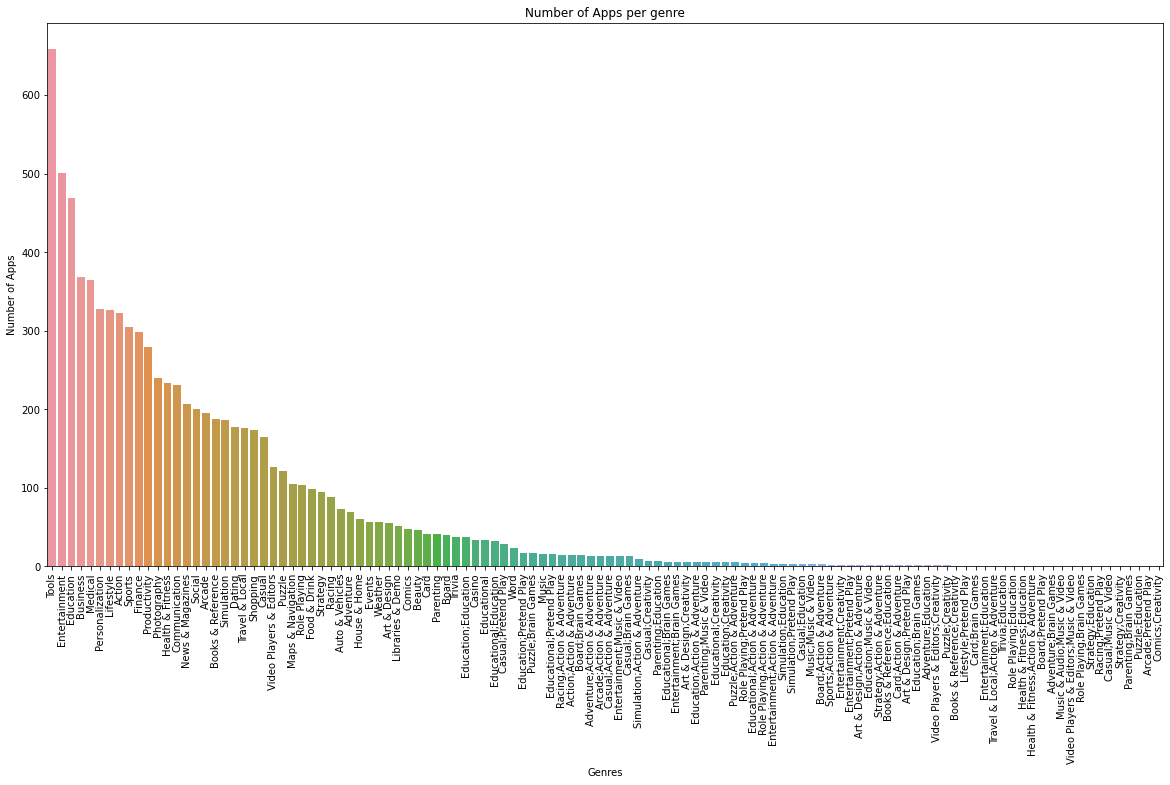

In [27]:
genre= df['Genres'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=genre.index,y=genre.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.xlabel('Genres')
plt.title("Number of Apps per genre")

### Result 
1. From the above plot we can clearly say that Tools related apps has the highest number of Apps released in play store.
2. From the plot we can also observed that Entertainemnt apps are also trending and second highest released in play store.
3. Education related apps are growing day by day as we can see and is the third highest released in play store

Max:  Category
ENTERTAINMENT    14.630515
Name: Installs, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

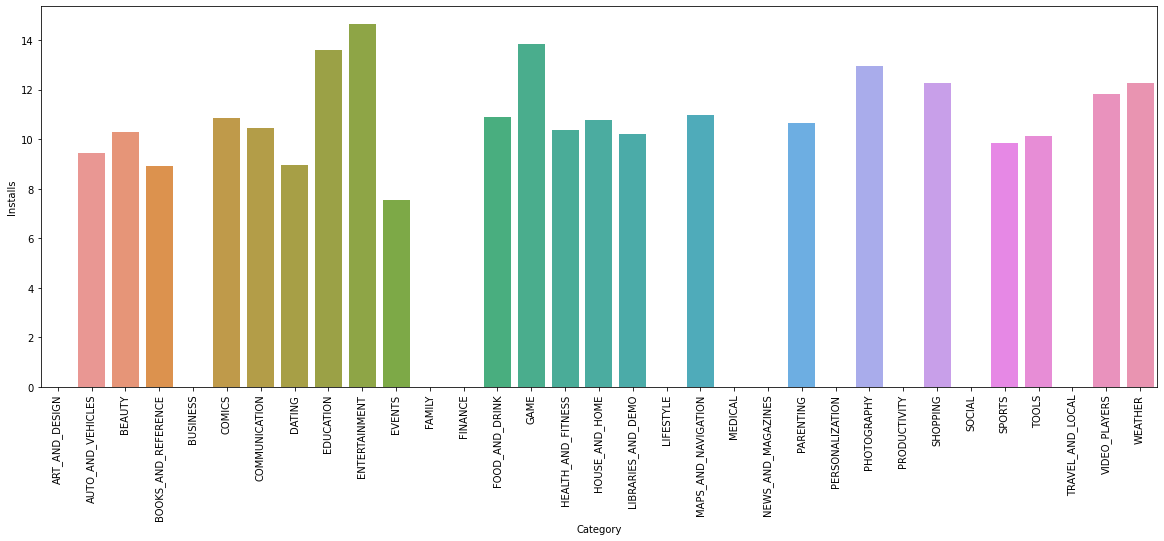

In [28]:
d2=df[df.Rating>4].groupby('Category')['Installs'].mean()
print("Max: ", d2[d2==d2.max()])
# a1=d2.plot(kind='bar',rot=90)
# a1.set_ylabel("Reviews")
plt.figure(figsize=(20,7))
ax = sns.barplot(x=d2.index, y=d2.values)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=90)

### Result 
 Apps of Entertainment category are the highest no of Installs out of all the category present in play store. 

In [29]:
#Counting number of ratings for each category
d4=df.groupby('Category')['Rating'].mean()

In [30]:
d4[d4==d4.max()]

Category
EDUCATION    4.382738
Name: Rating, dtype: float64

(4.0, 4.5)

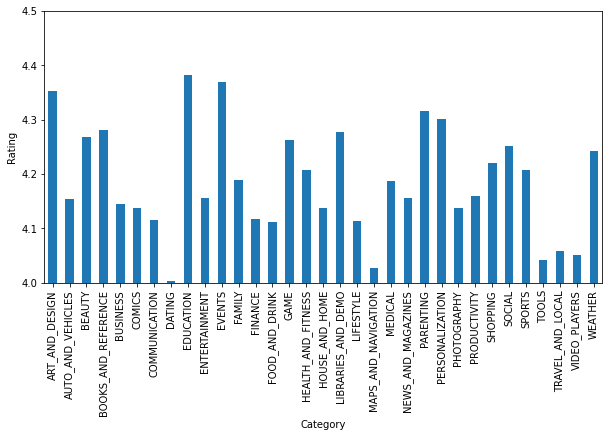

In [31]:
a = d4.plot.bar(x='Category', y='Rating', rot=90, figsize=(10,5))
a.set_ylabel("Rating")
a.set_ylim(4,4.5)

### Result 
Education field apps tend to be more successful in terms of average ratings

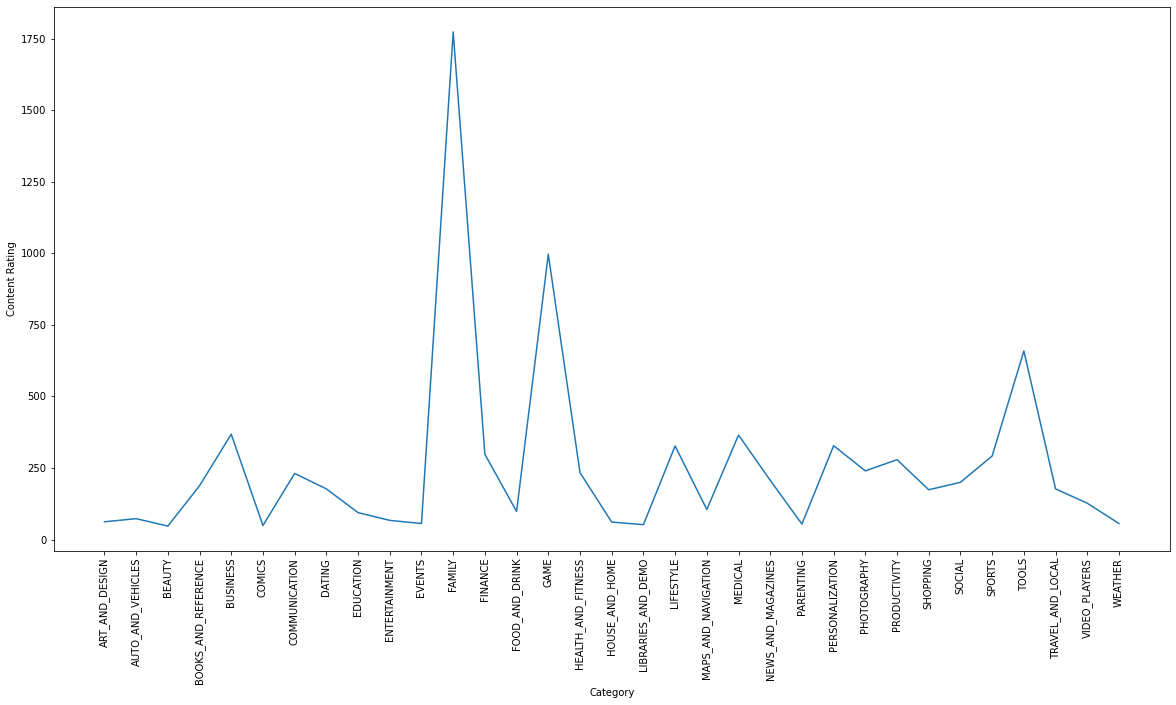

In [32]:
df5=df.groupby('Category')['ContentRating'].count()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Content Rating")
sns.lineplot(x=df5.index , y =df5.values, palette="Set1")
plt.show()

### Result:-  
Apps of Family Category are most in number on Google Play Store

In [33]:
#Total number of apps for each age group 
df['ContentRating'].value_counts(dropna=False)

Everyone           6892
Teen                942
Mature 17+          366
Everyone 10+        312
Adults only 18+       2
Unrated               2
Name: ContentRating, dtype: int64

ContentRating
Adults only 18+      370.110000
Everyone            1739.885271
Everyone 10+       16514.330256
Mature 17+          1117.743251
Teen                3318.940924
Unrated                5.935000
Name: Reviews, dtype: float64


Text(0.5, 1.0, 'Content Rating in Play Store')

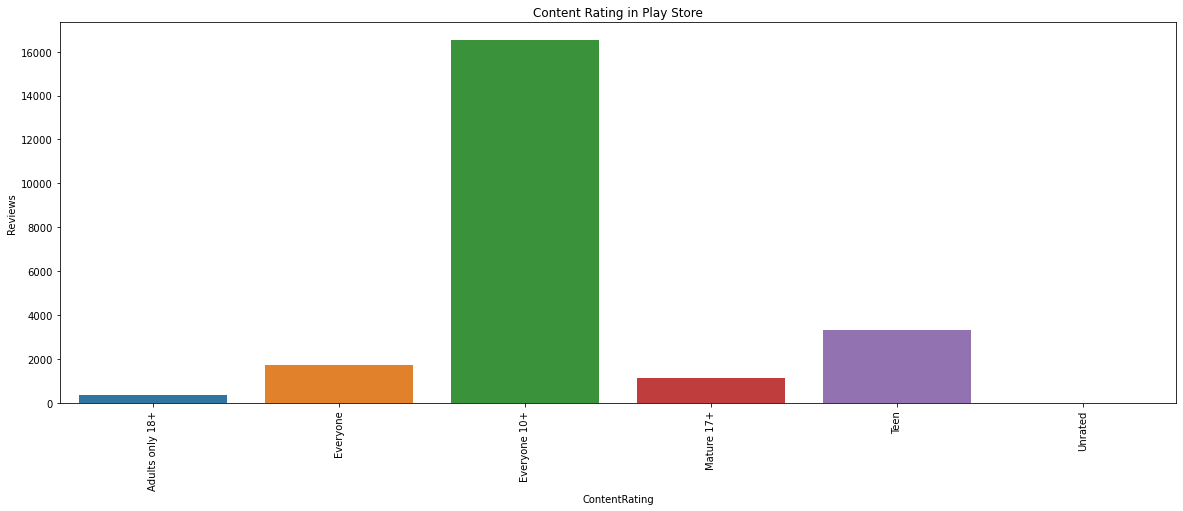

In [34]:
d20=df.groupby('ContentRating')['Reviews'].mean()
d20[d20==d20.max()]
print(d20)
plt.figure(figsize=(20,7))
sns.barplot(x=d20.index,y=d20.values)
plt.xticks(rotation=90)
plt.ylabel('Reviews')
plt.xlabel('ContentRating')
plt.title("Content Rating in Play Store")

### Result 
Apps of Content Rating 'Everyone 10+' has received most reviews

In [35]:
d7=df.groupby('ContentRating')['Rating'].mean()
d7[d7==d7.max()]

ContentRating
Adults only 18+    4.55
Name: Rating, dtype: float64

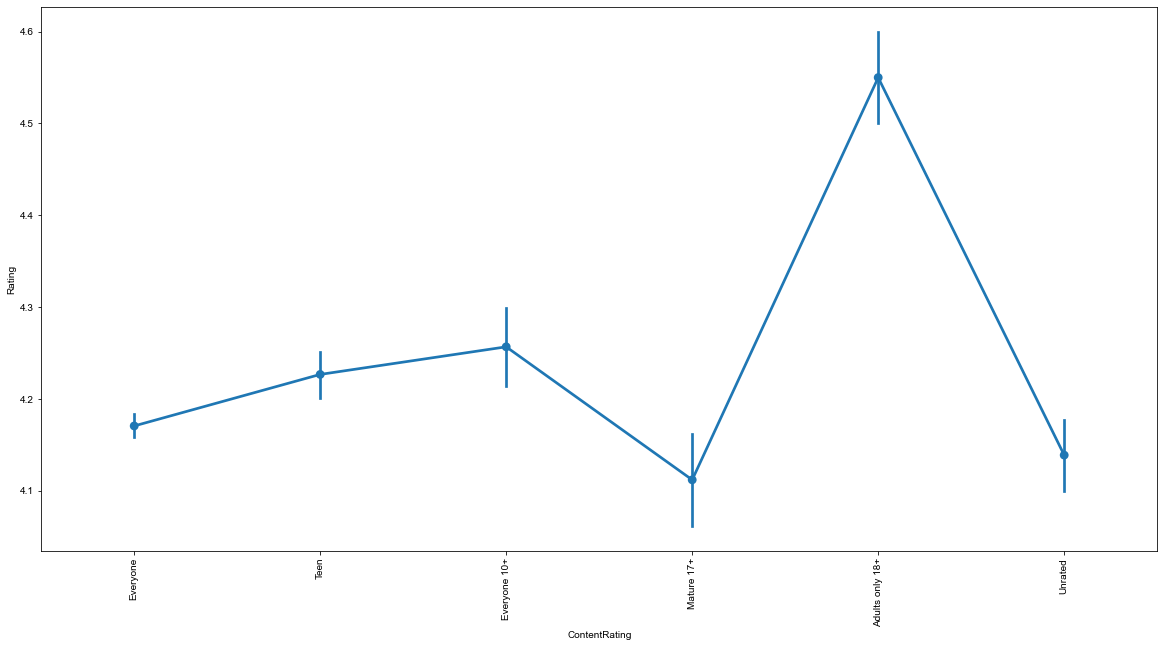

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)  
# draw pointplot 
sns.pointplot(x = "ContentRating", 
              y = "Rating", 
              data =df) 
# show the plot 
sns.set(font_scale=2)
plt.xlabel("ContentRating")
plt.ylabel("Rating")
plt.show()

### Result 
Higest average ratings are for the apps with Content Rating of 'Adults only 18+'

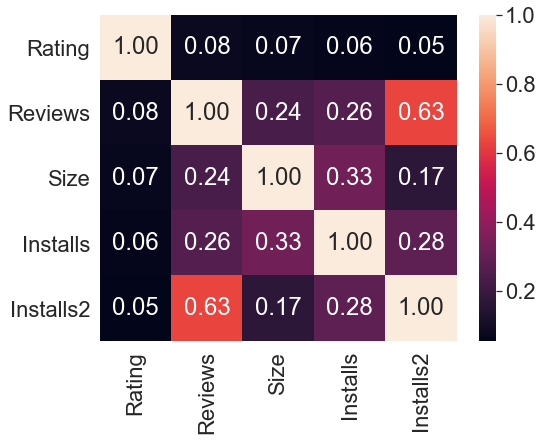

In [37]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr(), annot=True, fmt='.2f',ax=ax)

### Result :-
1. We will now find out the correlation between all the different attributes using the HeatMap.
2. Correlograms or HeatMaps are often seen in an exploratory role, So In the above plot it is helping us to understand relationships between variables during building descriptive or predictive statistical models.
3. It show all the correlations between variables in a dataset

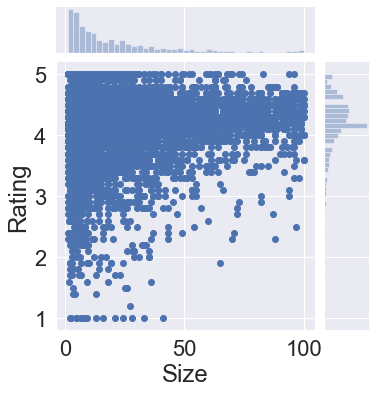

In [38]:
sns.jointplot(x='Size', y='Rating', data=df)
plt.show()

### Result 
1. Allows us to see scatter plot together with a histogram of two variables and see how they are distributed
2. from the above plot we can say that lower ratings of apps given have small size in play store and consumes less memory.
3. Around 4.2 to 4.3 ratings are the apps which contains large amount of Size and consumes more memory.
4. and from the plots we can also state that highest rating of apps i.e above 4.7 are also smaller in size compare to 4.1 to 4.6 ratings of app..

In [39]:
# convert in category to count and use these columns
df.App = df.App.astype('category')
df.Genres = df.Genres.astype('category')
df.Reviews = df.Reviews.astype('category')

In [40]:
# subsetting the dataframe
App_genre1 = df.loc[(df.Genres == 'Tools') | (df.Genres == 'Comics') | \
                       (df.Genres == 'Card') | (df.Genres == 'Weather') | \
                       (df.Genres == 'Events') | (df.Genres == 'Beauty')]

In [41]:
# subsetting the dataframe
App_genre2 = df.loc[(df.Genres == 'Racing') | (df.Genres == 'Health & Fitness') | \
                       (df.Genres == 'Finance') | (df.Genres == 'Casual') | \
                       (df.Genres == 'Arcade') | (df.Genres == 'Action')]

In [42]:
# subsetting the dataframe
App_genre3 = df.loc[(df.Genres == 'Dating') | (df.Genres == 'Education') | \
                       (df.Genres == 'Entertainment') | (df.Genres == 'Food & Drink') | \
                       (df.Genres == 'Strategy') | (df.Genres == 'Lifestyle')]

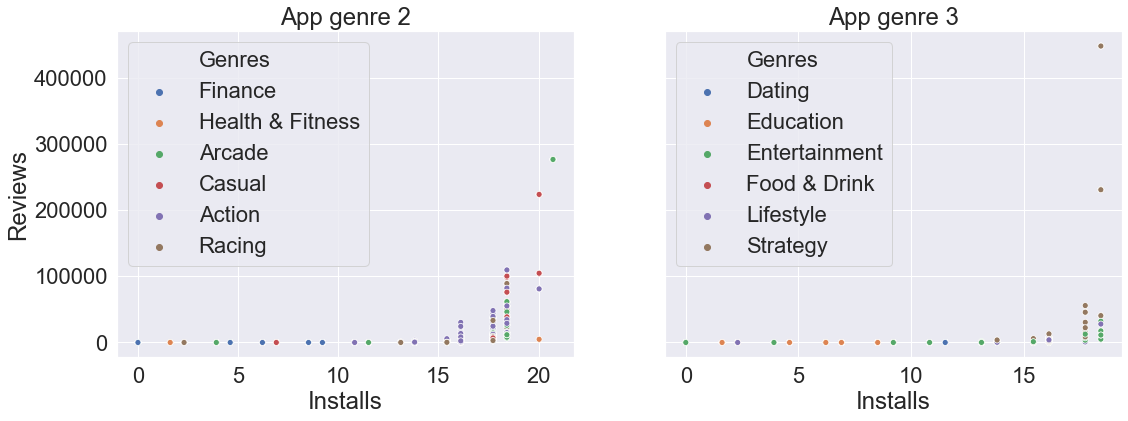

In [45]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
sns.scatterplot(x="Installs", y="Reviews", hue="Genres", data=App_genre2, ax=axes[0])
axes[0].set_title('App genre 2')
sns.scatterplot(x="Installs", y="Reviews", hue="Genres", data=App_genre3, ax=axes[1])
axes[1].set_title('App genre 3')
plt.show()

### Result 
1. In App Genre 2 Arcade has the highest no of reviews as well as Installs 
2. In App Genre 3 Strategy has the highest no of reviews as well as Installs

# Displaying the Apps having maximum and minimum values in various categories.

In [46]:
min_rating=df['Rating'].idxmin()
print('The App with the least rating is',df.at[min_rating,'App'],\
      "and its rating is",df['Rating'].min(),'.')

The App with the least rating is House party - live chat and its rating is 1.0 .


In [47]:
max_rating=df['Rating'].idxmax()
print('The App with the highest rating is',df.at[max_rating,'App'],\
      "and its rating is",df['Rating'].max(),'.')

The App with the highest rating is Hojiboy Tojiboyev Life Hacks and its rating is 5.0 .


In [48]:
max_install=df['Installs'].idxmax()
print('The App with the highest Installs in play store is',df.at[max_install,'App'],'.')

The App with the highest Installs in play store is Subway Surfers .


In [49]:
min_install=df['Installs'].idxmin()
print('The App with the least no of Install in play store is',df.at[min_install,'App'],'.')

The App with the least no of Install in play store is Popsicle Launcher for Android P 9.0 launcher .


In [50]:
min_Size=df['Size'].idxmin()
print('The App with the least consumption of Memory in play store is',df.at[min_Size,'App'],\
      "and its Size is",df['Size'].min(),'.')

The App with the least consumption of Memory in play store is News.aw and its Size is 1.0 .


In [51]:
max_Size=df['Size'].idxmax()
print('The App with the highest consumption of Memory in play store is',df.at[max_Size,'App'],\
      "and its Size is",df['Size'].max(),'.')

The App with the highest consumption of Memory in play store is Post Bank and its Size is 100.0 .


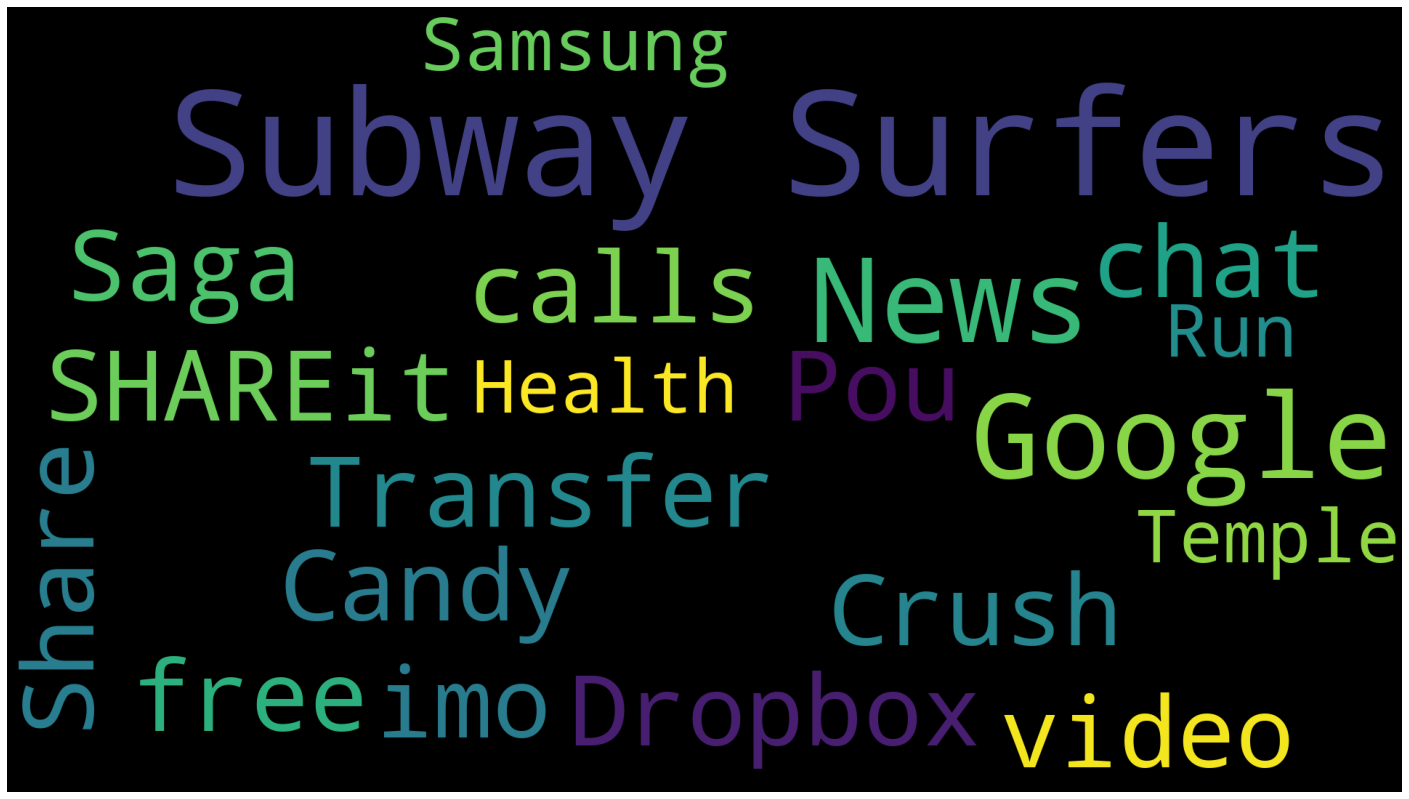

In [52]:
df_ins_asc=df.sort_values(by=['Installs'],axis=0,ascending=False,inplace=False)
from wordcloud import WordCloud 
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_ins_asc.head(20)['App']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Result 
Apps with highest no of installs in google play store.

# Predictive Analysis

In [53]:
pd.get_dummies(data=df, columns=['Category','ContentRating'])

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,LastUpdated,CurrentVer,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,ContentRating_Adults only 18+,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.10000,1.59,19.0,9.210340,Free,0,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.90000,9.67,14.0,13.122363,Free,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.70000,875.10,8.7,15.424948,Free,0,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.50000,2156.44,25.0,17.727534,Free,0,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.30000,9.67,2.8,11.512925,Free,0,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,4.17741,0.00,9.6,2.302585,Free,0,Business,"September 29, 2016",1.1.5,...,0,0,0,0,0,1,0,0,0,0
10836,Sya9a Maroc - FR,4.50000,0.38,53.0,8.517193,Free,0,Education,"July 25, 2017",1.48,...,0,0,0,0,0,1,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.00000,0.04,3.6,4.605170,Free,0,Education,"July 6, 2018",1,...,0,0,0,0,0,1,0,0,0,0
10838,Parkinson Exercices FR,4.17741,0.03,9.5,6.907755,Free,0,Medical,"January 20, 2017",1,...,0,0,0,0,0,1,0,0,0,0


In [54]:
#dcat dataframe has size, onehot of category and content rating
dcat=pd.get_dummies(df,columns=['Category','ContentRating'])
dcat=dcat.drop(['App','Rating','Reviews','Price','Installs','Installs2','Type','Genres','LastUpdated','CurrentVer','AndroidVer'], axis=1)
dcat.head

<bound method NDFrame.head of        Size  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0      19.0                        1                           0   
1      14.0                        1                           0   
2       8.7                        1                           0   
3      25.0                        1                           0   
4       2.8                        1                           0   
...     ...                      ...                         ...   
10835   9.6                        0                           0   
10836  53.0                        0                           0   
10837   3.6                        0                           0   
10838   9.5                        0                           0   
10840  19.0                        0                           0   

       Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0                    0                             0                  0   
1  

In [55]:
import scipy
import sklearn
#import scikit-learn
import nltk

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['Genres'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Some Pre-processing of data for the use of predictive analysis

In [57]:
#Convert all text of Category
df['Category'] = df['Category'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['Category'] = df['Category'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.Category.head()

0    artanddesign
1    artanddesign
2    artanddesign
3    artanddesign
4    artanddesign
Name: Category, dtype: object

In [58]:
df['Genres'] = df.Genres.apply(lambda x: x.replace(';', " "))
#Convert all text of Genres
df['Genres'] = df['Genres'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['Genres'] = df['Genres'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.Genres.head()

0                 art design
1    art design pretend play
2                 art design
3                 art design
4      art design creativity
Name: Genres, dtype: category
Categories (116, object): [action, action action adventure, adventure, adventure action adventure, ..., video players editors creativity, video players editors music video, weather, word]

In [59]:
#Convert all text of Content Rating
df['ContentRating'] = df['ContentRating'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['ContentRating'] = df['ContentRating'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['ContentRating'].head()

0    everyone
1    everyone
2    everyone
3        teen
4    everyone
Name: ContentRating, dtype: object

In [60]:
#dx dataframe contains size and price
dx=df.drop(['App','Category','Rating','Reviews','Installs','Installs2','Type','ContentRating','Genres','LastUpdated','CurrentVer','AndroidVer'], axis=1)
print(dx.head)

<bound method NDFrame.head of        Size Price
0      19.0     0
1      14.0     0
2       8.7     0
3      25.0     0
4       2.8     0
...     ...   ...
10835   9.6     0
10836  53.0     0
10837   3.6     0
10838   9.5     0
10840  19.0     0

[8516 rows x 2 columns]>


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf on Genres
v = TfidfVectorizer()
x = v.fit_transform(df['Genres'])
print(v.vocabulary_)
print(v.idf_)
x.toarray()
#to convert sparse matrix to dataframe
a1=pd.DataFrame(x.todense())
type(a1)
a1.head

{'art': 3, 'design': 19, 'pretend': 48, 'play': 45, 'creativity': 16, 'action': 0, 'adventure': 1, 'auto': 5, 'vehicles': 62, 'beauty': 6, 'books': 8, 'reference': 52, 'business': 10, 'comics': 14, 'communication': 15, 'dating': 17, 'education': 22, 'brain': 9, 'games': 29, 'entertainment': 24, 'music': 39, 'video': 63, 'events': 25, 'finance': 26, 'food': 28, 'drink': 20, 'health': 30, 'fitness': 27, 'house': 32, 'home': 31, 'libraries': 33, 'demo': 18, 'lifestyle': 34, 'arcade': 2, 'casual': 13, 'card': 11, 'strategy': 58, 'puzzle': 50, 'sports': 57, 'word': 65, 'racing': 51, 'simulation': 55, 'board': 7, 'trivia': 61, 'role': 53, 'playing': 47, 'educational': 23, 'audio': 4, 'players': 46, 'editors': 21, 'medical': 38, 'social': 56, 'shopping': 54, 'photography': 44, 'travel': 60, 'local': 35, 'tools': 59, 'personalization': 43, 'productivity': 49, 'parenting': 42, 'weather': 64, 'news': 41, 'magazines': 36, 'maps': 37, 'navigation': 40, 'casino': 12}
[3.97677491 4.83488369 4.702711

<bound method NDFrame.head of        0    1    2         3    4    5    6    7    8    9   ...   56   57  \
0     0.0  0.0  0.0  0.707107  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0  0.0  0.507177  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0  0.0  0.707107  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0  0.0  0.707107  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.0  0.0  0.0  0.554653  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8511  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8512  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8513  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8514  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8515  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

       58   59   60   61   62   6

In [62]:
#tfidf on APP
y = TfidfVectorizer()
z = y.fit_transform(df['App'])
#print(y.vocabulary_)
#print(y.idf_)
#to convert sparse matrix to dataframe
a2=pd.DataFrame(z.todense())
type(a2)
#w=np.concatenate((z,x),axis=1)
#sp_arr = csr_matrix(z)
#sdf = pd.SparseDataFrame(sp_arr)
a2.head

<bound method NDFrame.head of       0     1     2     3     4     5     6     7     8     9     ...  7801  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8511   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8512   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8514   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8515   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      7802  7803  780

In [63]:
# Joining dcat and dx dataframes
dq= pd.concat([dcat, dx],axis=1)
dq.head

<bound method NDFrame.head of        Size  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0      19.0                        1                           0   
1      14.0                        1                           0   
2       8.7                        1                           0   
3      25.0                        1                           0   
4       2.8                        1                           0   
...     ...                      ...                         ...   
10835   9.6                        0                           0   
10836  53.0                        0                           0   
10837   3.6                        0                           0   
10838   9.5                        0                           0   
10840  19.0                        0                           0   

       Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0                    0                             0                  0   
1  

In [64]:
## Now dq contains Category, Content Rating, Size and price in numerical form. SO it can be used as dq for predictive analysis

In [65]:
dpp= pd.concat([dq, a1, a2],axis=1)
dpp=dpp.loc[:, ~dpp.columns.duplicated()]
dpp.head

<bound method NDFrame.head of        Size  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0      19.0                      1.0                         0.0   
1      14.0                      1.0                         0.0   
2       8.7                      1.0                         0.0   
3      25.0                      1.0                         0.0   
4       2.8                      1.0                         0.0   
...     ...                      ...                         ...   
10835   9.6                      0.0                         0.0   
10836  53.0                      0.0                         0.0   
10837   3.6                      0.0                         0.0   
10838   9.5                      0.0                         0.0   
10840  19.0                      0.0                         0.0   

       Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0                  0.0                           0.0                0.0   
1  

In [66]:
min=0
dpp=dpp.fillna(0.0)
dpp.head

<bound method NDFrame.head of        Size  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0      19.0                      1.0                         0.0   
1      14.0                      1.0                         0.0   
2       8.7                      1.0                         0.0   
3      25.0                      1.0                         0.0   
4       2.8                      1.0                         0.0   
...     ...                      ...                         ...   
10835   9.6                      0.0                         0.0   
10836  53.0                      0.0                         0.0   
10837   3.6                      0.0                         0.0   
10838   9.5                      0.0                         0.0   
10840  19.0                      0.0                         0.0   

       Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0                  0.0                           0.0                0.0   
1  

In [67]:
min=0
dpp=dpp.fillna(0.0)
dpp.head

<bound method NDFrame.head of        Size  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0      19.0                      1.0                         0.0   
1      14.0                      1.0                         0.0   
2       8.7                      1.0                         0.0   
3      25.0                      1.0                         0.0   
4       2.8                      1.0                         0.0   
...     ...                      ...                         ...   
10835   9.6                      0.0                         0.0   
10836  53.0                      0.0                         0.0   
10837   3.6                      0.0                         0.0   
10838   9.5                      0.0                         0.0   
10840  19.0                      0.0                         0.0   

       Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0                  0.0                           0.0                0.0   
1  

In [68]:
y=dpp.Size
x=dpp

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [69]:
lm=linear_model.LinearRegression()

model=lm.fit(x_train,y_train)
predictions=lm.predict(x_test)

In [70]:
print("Score:" , (model.score(x_test, y_test)*100))

Score: 99.99999998790794
